# Augmentasi Data Citra


In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download zip file dari drive
!gdown --id 1ifxH3Vy-QiQ118OTr3KkIbD3zXBtBVR4

zip_file_path = '/content/Latihan_Dataset.zip'
extract_path = '/content/Latihan_Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Extrak ZIP File
extracted_folder = os.listdir(extract_path)
print(extracted_folder)


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ifxH3Vy-QiQ118OTr3KkIbD3zXBtBVR4
From (redirected): https://drive.google.com/uc?id=1ifxH3Vy-QiQ118OTr3KkIbD3zXBtBVR4&confirm=t&uuid=67b5f7ba-2a42-42a5-aeee-0f144ad558dd
To: /content/Latihan_Dataset.zip
100% 104M/104M [00:02<00:00, 45.8MB/s]
['Latihan_Dataset']


In [ ]:
# Define image size and batch size
tf.random.set_seed(42)
np.random.seed(42)

# Menentukan ukuran gambar dan ukuran batch
IMG_HEIGHT, IMG_WIDTH = 300, 300
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 3
CLASSES = ["daisy", "sunflower", "tulip"]
DATASET_PATH = '/content/Latihan_Dataset/Latihan_Dataset'

In [ ]:
data_dir = pathlib.Path(DATASET_PATH)

In [ ]:
# Function to apply random rotation for augmentation
def augment_image(image):
    # Randomly rotate the image between -20 and 20 degrees
    image = tf.image.rot90(image, k=np.random.choice([0, 1, 2, 3]))
    return image

In [ ]:
# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    class_names=CLASSES,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    seed=42,
    validation_split=0.3,
    subset="training"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    class_names=CLASSES,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    seed=42,
    validation_split=0.3,
    subset="validation"
)

# Apply the augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (augment_image(x), y))


Found 1603 files belonging to 3 classes.
Using 1123 files for training.
Found 1603 files belonging to 3 classes.
Using 480 files for validation.


In [ ]:
# Model CNN
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 285s 8s/step - accuracy: 0.4760 - loss: 2.2509 - val_accuracy: 0.6396 - val_loss: 0.8285
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.7874 - loss: 0.5748 - val_accuracy: 0.6396 - val_loss: 0.8014
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 308s 8s/step - accuracy: 0.8046 - loss: 0.4785 - val_accuracy: 0.7000 - val_loss: 0.7633
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.8666 - loss: 0.3676 - val_accuracy: 0.7063 - val_loss: 0.9045
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 276s 8s/step - accuracy: 0.9073 - loss: 0.2299 - val_accuracy: 0.6771 - val_loss: 1.0237
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 275s 8s/step - accuracy: 0.9626 - loss: 0.1266 - val_accuracy: 0.6438 - val_loss: 2.1330
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 274s 8s/step - accuracy: 0.9493 - loss: 0.1403 - val_accuracy: 0.6833 - val_loss: 1.5792
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 277s 8s/step - accuracy: 0.9788 - loss: 0.0751 - val_accuracy: 0.6604 - v

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6875 - loss: 4.9065
Test accuracy : 0.7083333134651184
Test loss : 3.781648874282837


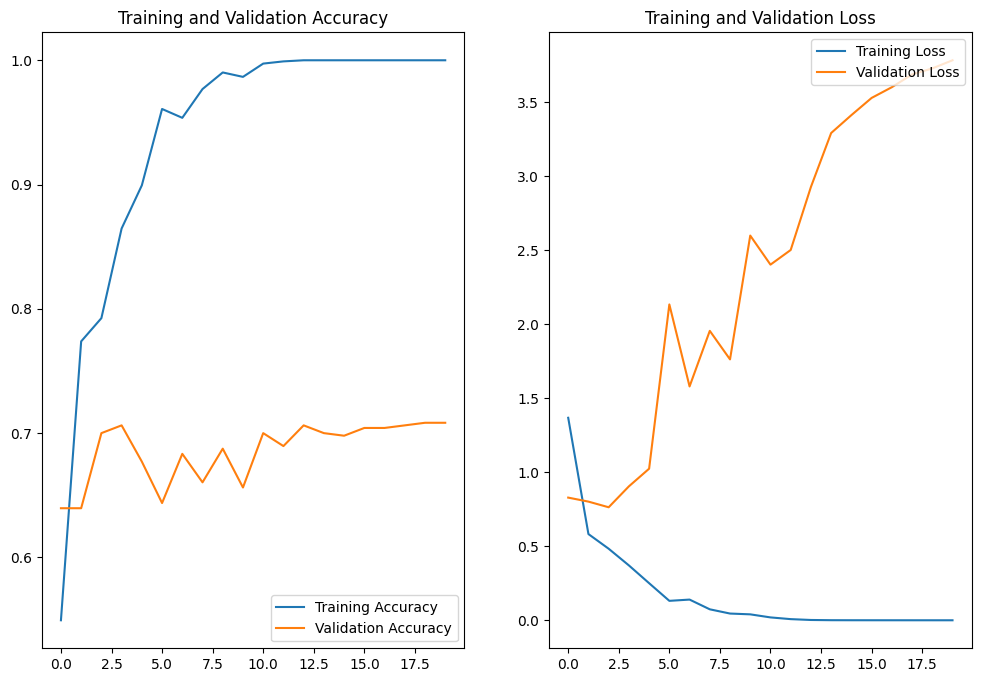

In [ ]:
# Memplot akurasi dan loss pelatihan dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=CLASSES))

              precision    recall  f1-score   support

       daisy       0.59      0.83      0.69       132
   sunflower       0.74      0.72      0.73       148
       tulip       0.83      0.62      0.71       200

    accuracy                           0.71       480
   macro avg       0.72      0.72      0.71       480
weighted avg       0.73      0.71      0.71       480



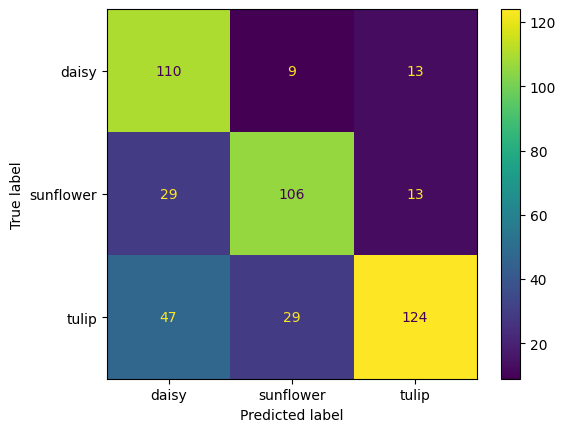

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()
plt.show()